In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from collections import Counter
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPool2D, Dropout, Flatten
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


In [3]:
os.environ["CUDA_VISIBLE_DEVICES"] = "0"   #enable parallel computing using GPU

In [4]:
df_train = pd.read_csv('C:/Users/pzhai/Google Drive/gdrive/KGL/MNIST/data/train.csv')
df_test = pd.read_csv('C:/Users/pzhai/Google Drive/gdrive/KGL/MNIST/data/test.csv')
print('training dataset shape: ',df_train.shape,';  testing dataset shape: ',df_test.shape)

training dataset shape:  (42000, 785) ;  testing dataset shape:  (28000, 784)


In [5]:
df_train.head()   #show the first 5 rows in training dataset

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**The training dataset includes digit label and values of 28*28 pixels.**

In [6]:
df_train['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

**The value counts of label in training dataset show that the label is pretty balanced, so that we can use accuracy to measure the model's performance.**

In [7]:
X_train=df_train.drop(['label'],1).values   #separate the training dataset into X and y
y_train=df_train['label'].values
X_test=df_test.values

In [8]:
X_train=X_train/255.0
X_test=X_test/255.0
X_train=X_train.reshape(-1,28,28,1)      #reshape the data to a shape that keras accepts. 
X_test=X_test.reshape(-1,28,28,1)
y_train=to_categorical(y_train)          # categorize label to the format that keras accepts.

**Split the training dataset into training and validating datasets with the validating size of 0.2 of total data.**

In [9]:
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)


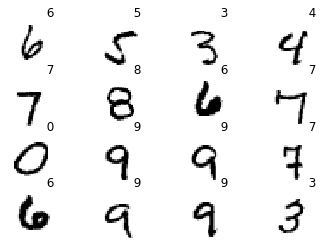

In [10]:
for i in range(16):
    # define subplot
    digit=y_train[i].argmax()
    plt.subplot(4, 4, 1 + i)
    # turn off axis
    plt.axis('off')
    # plot raw pixel data
    plt.imshow(X_train[i,:,:,0], cmap='gray_r')
    plt.title("          "+str(digit))
plt.show()

**model1: build LeNet CNN**


In [11]:
model1 = Sequential()
model1.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(28, 28, 1)))
model1.add(MaxPool2D(strides=2))
model1.add(Conv2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu'))
model1.add(MaxPool2D(strides=2))
model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(10, activation='softmax'))
model1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [13]:
model1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [15]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 48)        38448     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 48)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1200)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               153728    
_________________________________________________________________
dense_5 (Dense)              (None, 64)               

**Train the model.**

In [16]:
history1=model1.fit(X_train, y_train, batch_size=64, epochs=50,validation_data=(X_val,y_val))


Train on 33600 samples, validate on 8400 samples
Epoch 1/50
33600/33600 [==============================] - 50s 1ms/step - loss: 0.2216 - accuracy: 0.9316 - val_loss: 0.0783 - val_accuracy: 0.9750
Epoch 2/50
33600/33600 [==============================] - 50s 1ms/step - loss: 0.0604 - accuracy: 0.9810 - val_loss: 0.0547 - val_accuracy: 0.9812
Epoch 3/50
33600/33600 [==============================] - 49s 1ms/step - loss: 0.0417 - accuracy: 0.9861 - val_loss: 0.0396 - val_accuracy: 0.9877
Epoch 4/50
33600/33600 [==============================] - 48s 1ms/step - loss: 0.0315 - accuracy: 0.9895 - val_loss: 0.0367 - val_accuracy: 0.9877
Epoch 5/50
33600/33600 [==============================] - 49s 1ms/step - loss: 0.0247 - accuracy: 0.9927 - val_loss: 0.0349 - val_accuracy: 0.9899
Epoch 6/50
33600/33600 [==============================] - 56s 2ms/step - loss: 0.0178 - accuracy: 0.9943 - val_loss: 0.0411 - val_accuracy: 0.9883
Epoch 7/50
33600/33600 [==============================] - 57s 2ms/st

**Predict the label of testing dataset using the trained model, and save the results in csv file.**

In [17]:
y_test_predict_prob=model1.predict(X_test)
y_test_predict=np.zeros((len(X_test),2))
for i in range(0,len(X_test)):
    y_test_predict[i,0]=i+1
    y_test_predict[i,1]=np.argmax(y_test_predict_prob[i,:])
pd.DataFrame(y_test_predict,columns=['ImageId','Label']).to_csv('digit_predict_test.csv',index=False)


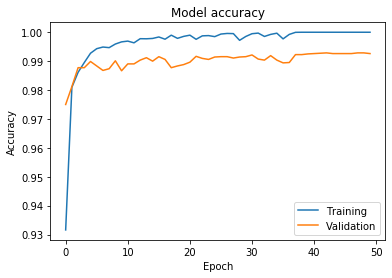

In [21]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()